# DESeq2 and GPcounts_NB on fission yeast dataset

Nuha BinTayyash, 2020

This notebook Compare DESeq2 results with GPcounts_NB on fission yeast dataset.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import metrics
import pandas as pd

In [2]:
#DESeq2 = pd.read_csv('fission_DESeq2_tst.csv',index_col=[0])
DESeq2_scaled = pd.read_csv('fission_DESeq2_tst_scaled.csv',index_col=[0])
DESeq2 = pd.read_csv('fission_DESeq2_tst.csv',index_col=[0])
#DESeq2 = DESeq2.loc[(DESeq2['baseMean'] > 0)]
print(DESeq2.shape)
GPcounts = pd.read_csv('ll_Negative_binomial_fission_normalized_counts_scaled.csv',index_col=[0])
GPcounts = GPcounts.loc[DESeq2.index]
print(GPcounts.shape)

(6459, 6)
(6459, 4)


In [3]:
DESeq_sorted = DESeq2.sort_values(by=['pvalue'])
DESeq_sorted

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
SPBC2F12.09c,174.671162,-2.657185,0.751020,98.267454,1.224945e-19,7.911920e-16
SPAC1002.18,444.504950,-0.051168,0.203134,57.672042,3.675626e-11,1.187043e-07
SPAC1002.19,336.373207,-0.392611,0.576457,42.999342,3.696211e-08,7.957941e-05
SPAC1002.17c,261.773133,-1.138898,0.608548,38.940974,2.440696e-07,3.941114e-04
SPNCRNA.1628,21.638834,0.201416,0.511589,28.035566,3.582068e-05,4.189223e-02
...,...,...,...,...,...,...
SPCPJ732.01,228.644608,0.105057,0.334712,0.139283,9.996335e-01,9.999412e-01
SPAC25H1.08c,1329.688464,-0.011105,0.183171,0.114618,9.997729e-01,9.999412e-01
SPAC29A4.05,456.659427,0.025396,0.161020,0.113559,9.997780e-01,9.999412e-01
SPCC1919.12c,741.087681,0.042403,0.210459,0.102344,9.998281e-01,9.999412e-01


In [4]:
GPcounts_sorted = GPcounts.sort_values(by=['log_likelihood_ratio'], ascending=False)
GPcounts_sorted.index.values[0:30]

array(['SPAC694.04c', 'SPAP7G5.04c', 'SPAP27G11.02', 'SPNCRNA.493',
       'SPCC794.04c', 'SPAC186.05c', 'SPAC22A12.11', 'SPBC336.08',
       'SPBC16E9.03c', 'SPBC1105.14', 'SPAC1093.01', 'SPAC23G3.10c',
       'SPNCRNA.1457', 'SPCC70.08c', 'SPNCRNA.624', 'SPAC186.06',
       'SPBC23G7.10c', 'SPAC513.03', 'SPAC186.04c', 'SPAC750.05c',
       'SPAC186.01', 'SPAC186.08c', 'SPAC186.02c', 'SPBC1773.17c',
       'SPNCRNA.1487', 'SPSNORNA.44', 'SPAC57A7.05', 'SPBC19C7.05',
       'SPNCRNA.802', 'SPAC19G12.17'], dtype=object)

In [6]:
DESeq_index = list(DESeq_sorted.index.values)
GPcounts_index = list(GPcounts_sorted.index.values)
GPcounts_idxes = []
for i in GPcounts_index:
    GPcounts_idxes.append(DESeq_index.index(i))
DESeq_idxes  = list(range(0,len(DESeq_index)))
print(len(DESeq_idxes))
len(GPcounts_idxes)

6459


6459

In [7]:
from scipy import stats

In [8]:
rho, pval = stats.spearmanr(DESeq_idxes,GPcounts_idxes)
print(rho,pval)

0.12890543396699825 2.4463820500216172e-25


In [9]:
DESeq_idxes

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [14]:
GPcounts_idxes

[2935,
 186,
 2948,
 3915,
 3867,
 6444,
 3138,
 2900,
 1672,
 3492,
 1308,
 3187,
 51,
 1716,
 6210,
 649,
 5172,
 3753,
 4928,
 2651,
 5581,
 913,
 146,
 3258,
 4098,
 6313,
 5594,
 239,
 27,
 36,
 4272,
 3875,
 182,
 44,
 4856,
 0,
 11,
 1202,
 6395,
 5646,
 4149,
 729,
 89,
 1705,
 550,
 309,
 188,
 1702,
 927,
 1132,
 2089,
 13,
 363,
 5101,
 1281,
 246,
 293,
 5500,
 2206,
 1798,
 31,
 918,
 150,
 460,
 46,
 1780,
 1121,
 4454,
 1413,
 1451,
 2187,
 3313,
 1638,
 6039,
 2856,
 429,
 4,
 800,
 2733,
 530,
 2333,
 1611,
 2895,
 1106,
 3537,
 3479,
 433,
 5039,
 1878,
 1948,
 217,
 528,
 594,
 141,
 5194,
 79,
 6163,
 506,
 3601,
 5095,
 57,
 1005,
 307,
 3123,
 233,
 411,
 3679,
 3842,
 232,
 2336,
 4050,
 4570,
 6096,
 222,
 4667,
 245,
 3125,
 2676,
 256,
 519,
 3812,
 1839,
 1332,
 968,
 6430,
 5295,
 2340,
 299,
 964,
 3903,
 338,
 47,
 431,
 14,
 3991,
 2360,
 4813,
 624,
 412,
 2003,
 1546,
 2286,
 526,
 900,
 3329,
 4960,
 1172,
 4589,
 24,
 1719,
 2374,
 3935,
 3729,
 1221,

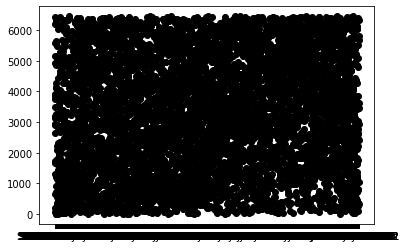

In [13]:
plt.plot(DESeq_index,GPcounts_idxes,'ko')
plt.show()

In [ ]:
plt.show()